In [30]:
import cv2

# Load YuNet model
model_path = "face_detection_yunet_2023mar.onnx"
detector = cv2.FaceDetectorYN.create(model_path, "", (320, 320), score_threshold=0.9, nms_threshold=0.3, top_k=5000)

In [31]:
# Load an image
image = cv2.imread("teammelli-iran17-768x480.jpg")

detector.setInputSize((image.shape[1], image.shape[0]))


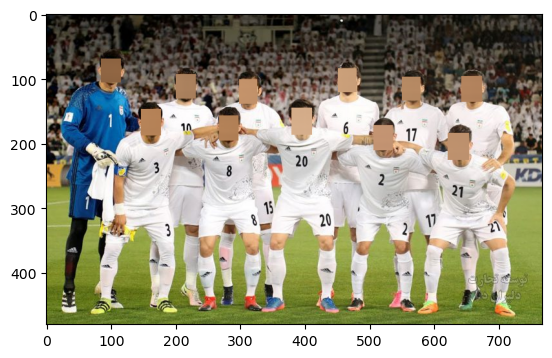

In [32]:
_, faces = detector.detect(image)
# Check if any faces are detected
if faces is not None:
    for face in faces:
        # Unpack face details
        x, y, w, h = face[:4]  # Bounding box (x, y, width, height)

        # Convert to integer values for indexing
        x, y, w, h = int(x), int(y), int(w), int(h)

        # Extract the face region (ROI)
        face_roi = image[y:y+h, x:x+w]

        # Apply a Gaussian blur to the face region
        face_roi_blurred = cv2.GaussianBlur(face_roi, (99, 99), 30)

        # Replace the original face region with the blurred version
        image[y:y+h, x:x+w] = face_roi_blurred

# Display the output
plt.imshow(image[...,::-1])

